# Group 6: Artificial Intelligence Techniques Assignment

1. [SECTION 1: INTRODUCTION](#SECTION-1:-INTRODUCTION)
   
2. [SECTION 2: METHOD](#SECTION-2:-METHOD)
   1. [2.1: Data Description](#2.1:-Data-Description)
   2. [2.2: Data Exploration & Visualization](#2.2:-Data-Exploration-&-Visualization)
   3. [2.3: Data Preprocessing](#2.3:-Data-Preprocessing)
   4. [2.4: Model Training & Validation](#2.4:-Model-Training-&-Validation)
       1. [Model 1: Decision Tree Classifier](#Model-1:-Decision-Tree-Classifier)


# SECTION 1: INTRODUCTION

# SECTION 2: METHOD


In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
ds = pd.read_csv('dataset.csv')

The “dataset.csv” dataset consists of 17 features (an individual’s demographic information,
eating habits, physical activities etc.) and one prediction output for three levels of cardiovascular
risk. The data contain certain complexity with missing data and noise. 

## 2.1: Data Description

In [3]:
# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
ds.head()

First Few Rows of the Dataset:


,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


In [4]:
# Display some important information of the data set
print("\nInformation of the data set:")
ds.info()


Information of the data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV        

In [5]:
# Get the shape of the dataset (number of rows and columns)
print("\nShape of the Dataset:")
print(f"Rows: {ds.shape[0]}, Columns: {ds.shape[1]}")


Shape of the Dataset:
Rows: 2100, Columns: 18


In [6]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
ds.isnull().any()


Missing Values in Each Column:


Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [7]:
# Display basic statistical information about the numerical columns
print("\nBasic Statistics of Numerical Features:")
ds.describe()


Basic Statistics of Numerical Features:


,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


In [8]:
# Display unique values in categorical columns to understand their distribution
categorical_columns = ds.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Features:")
for col in categorical_columns:
    print(f"{col}: {ds[col].unique()}")


Unique Values in Categorical Features:
Gender: ['Female' 'Male']
Family_history: ['no' 'yes']
Alcohol: ['low' 'none' 'medium' 'high']
Junk_food: ['yes' 'no']
Snack: ['Sometimes' 'Always' 'Frequently' 'No']
Smoking: ['no' 'yes']
Transportation: ['car' 'bus' 'walk' 'motorcycle' 'bicycle']
TV: ['rare' 'moderate' 'often']
Discipline: ['no' 'yes']
Cardiovascular_risk(y): ['medium' 'high' 'low']


## 2.2: Data Exploration & Visualization

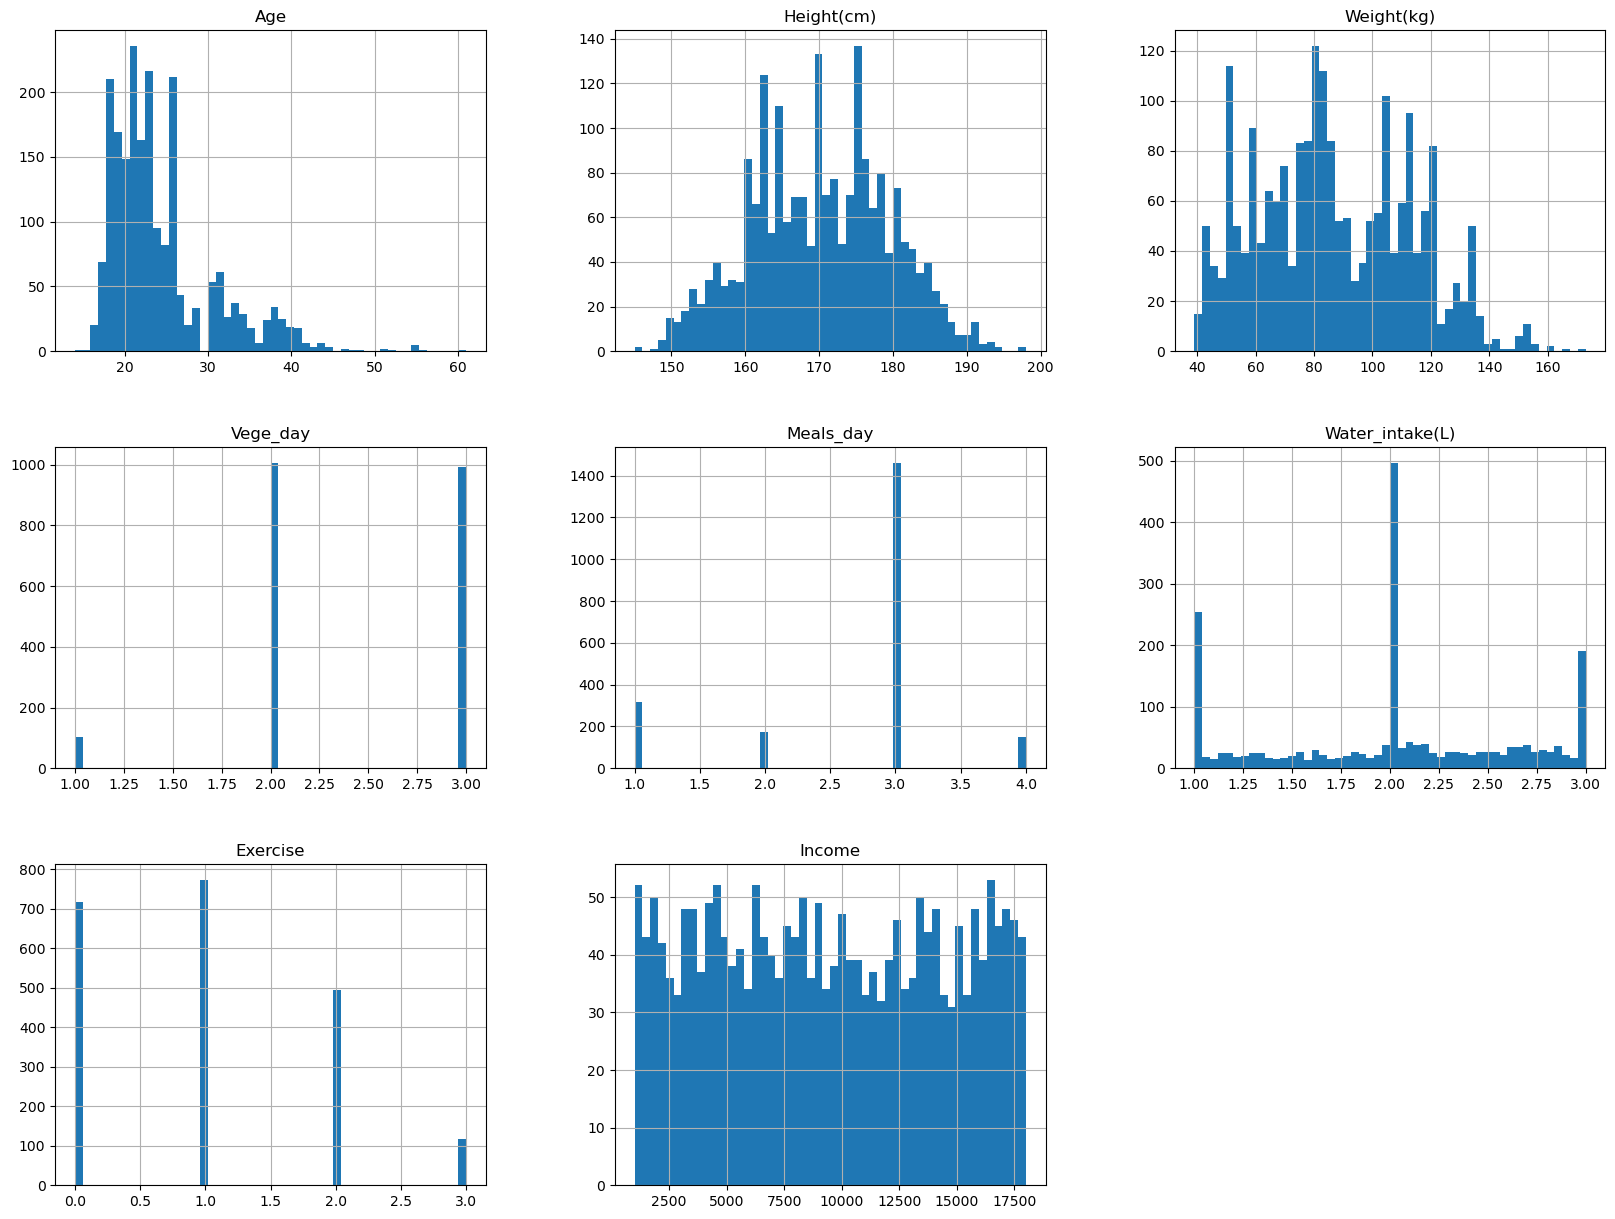

In [9]:
# Plotting histograms for all numerical features
ds.hist(bins=50, figsize=(20, 15))
plt.show()

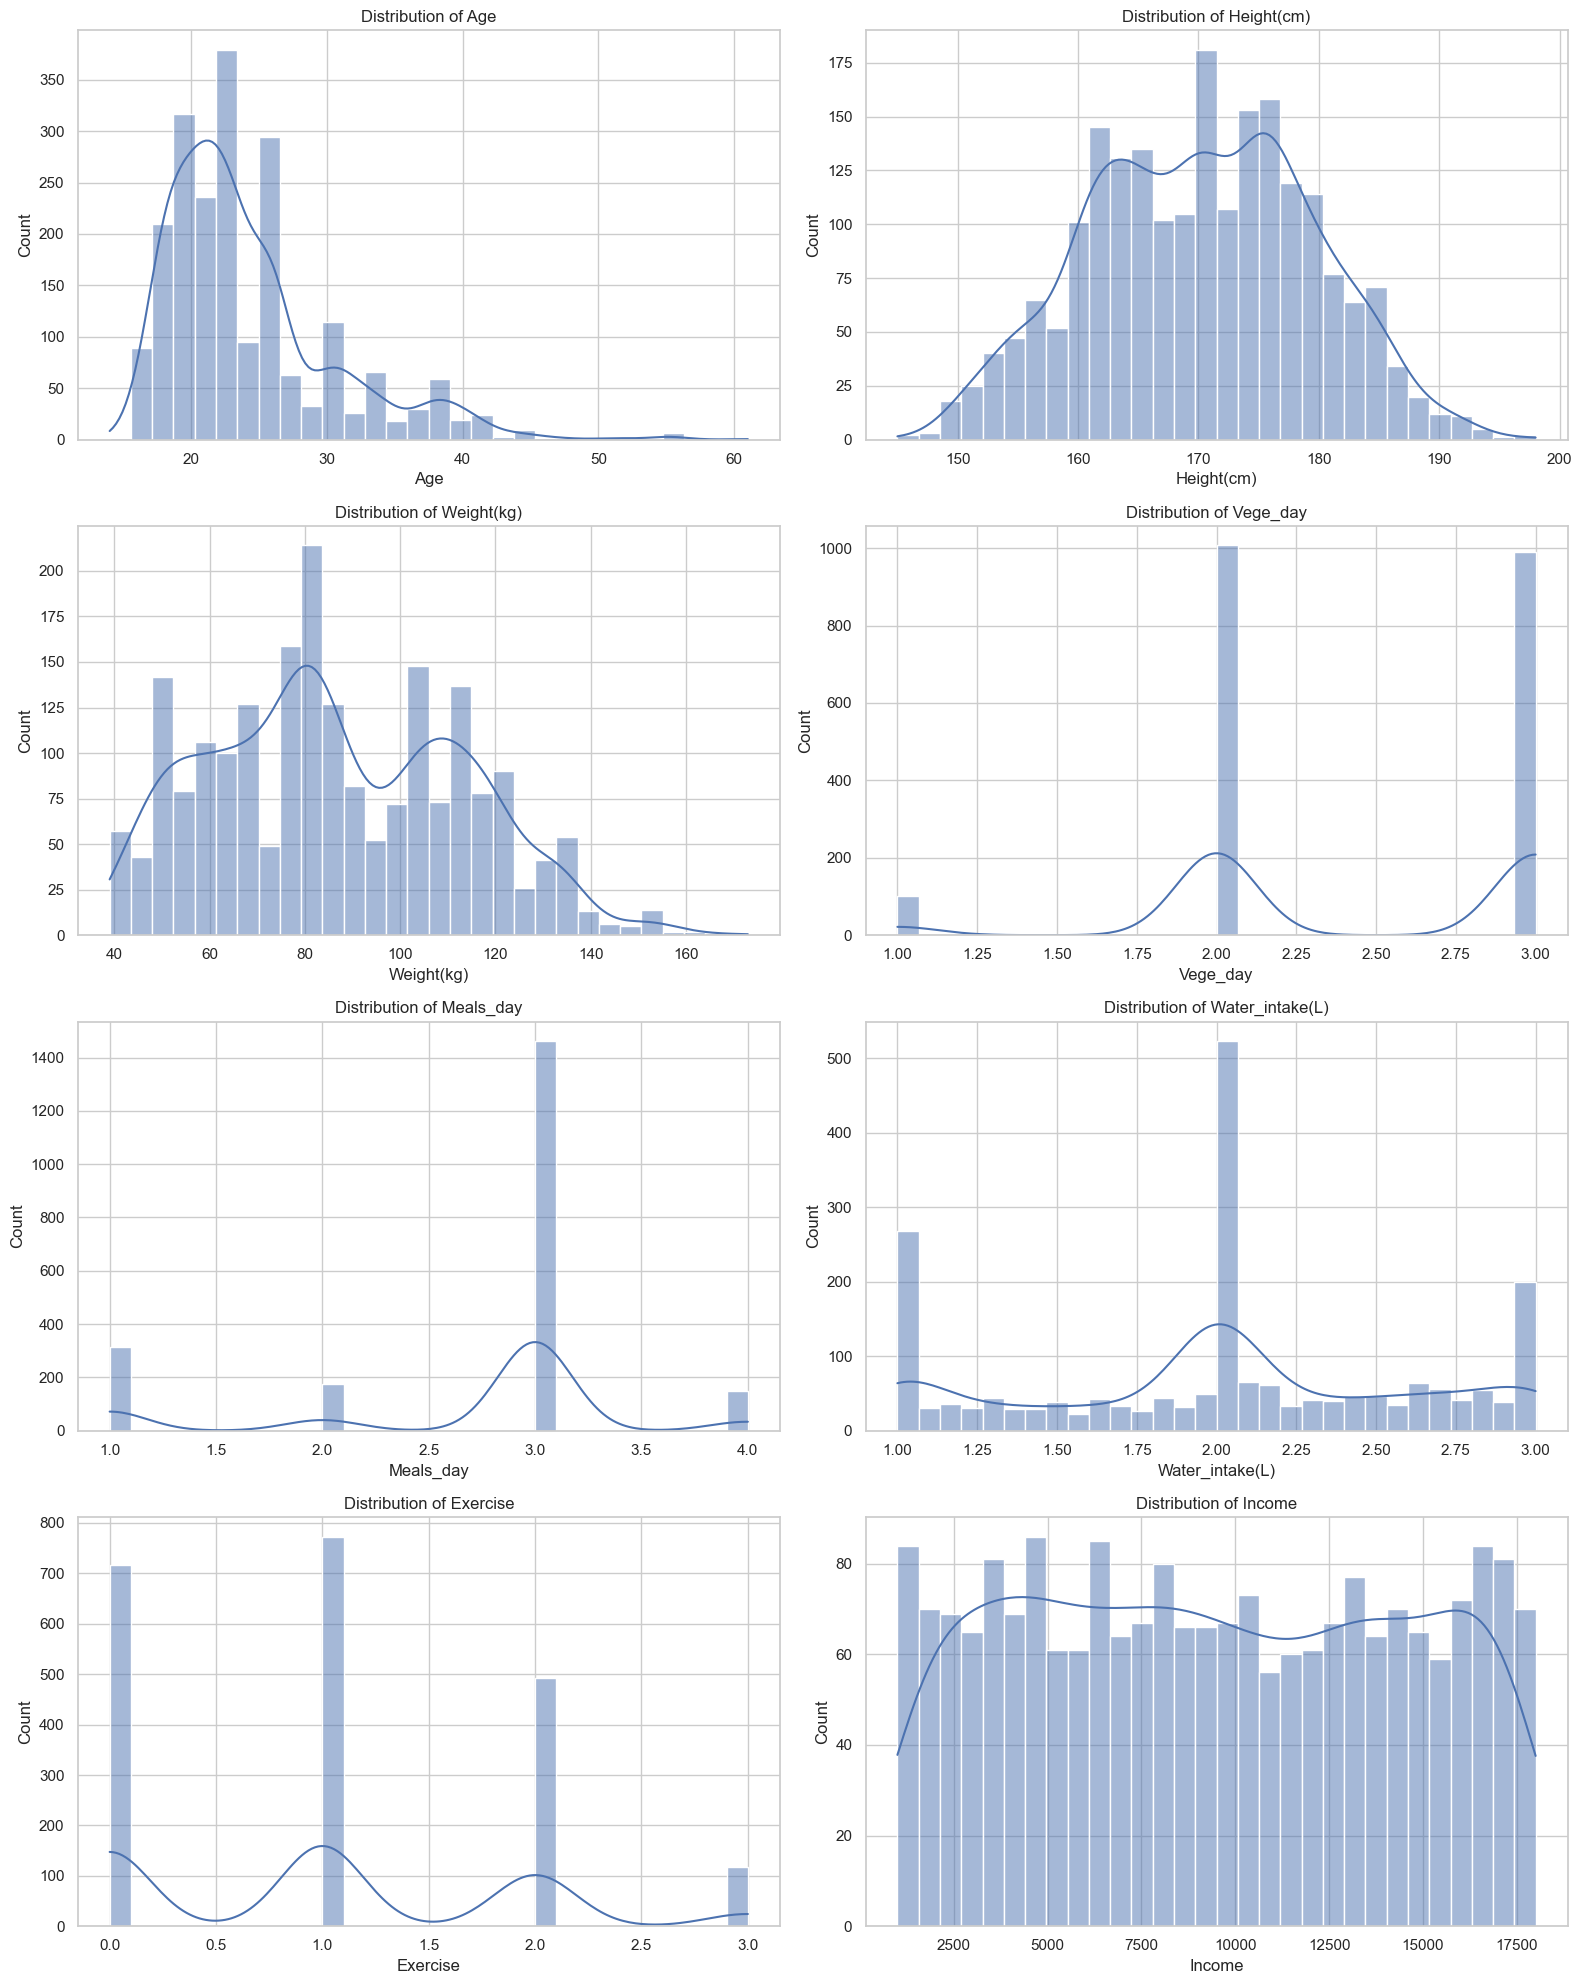

In [10]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a grid of subplots with 4 rows and 2 columns, and set the figure size
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))

# List all numerical features (columns) in the dataset 'ds'
numerical_features = ds.select_dtypes(include=['number']).columns.tolist()

# Loop through each numerical feature to create individual histograms
for i, feature in enumerate(numerical_features):
    # Plot histogram for each numerical feature with KDE (Kernel Density Estimate) overlaid
    sns.histplot(ds[feature], bins=30, kde=True, ax=axes[i//2, i%2])
    
    # Set the title for each subplot to indicate which feature is being plotted
    axes[i//2, i%2].set_title(f'Distribution of {feature}')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

plt.show()

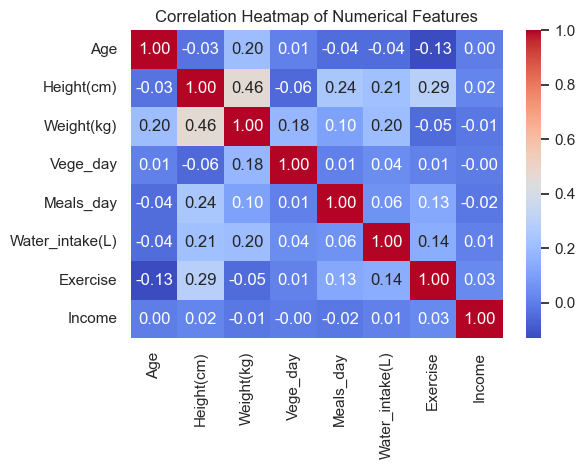

In [11]:
# Calculate the correlation matrix for numerical features only
numerical_ds = ds.select_dtypes(include=[float, int])
corr_matrix = numerical_ds.corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


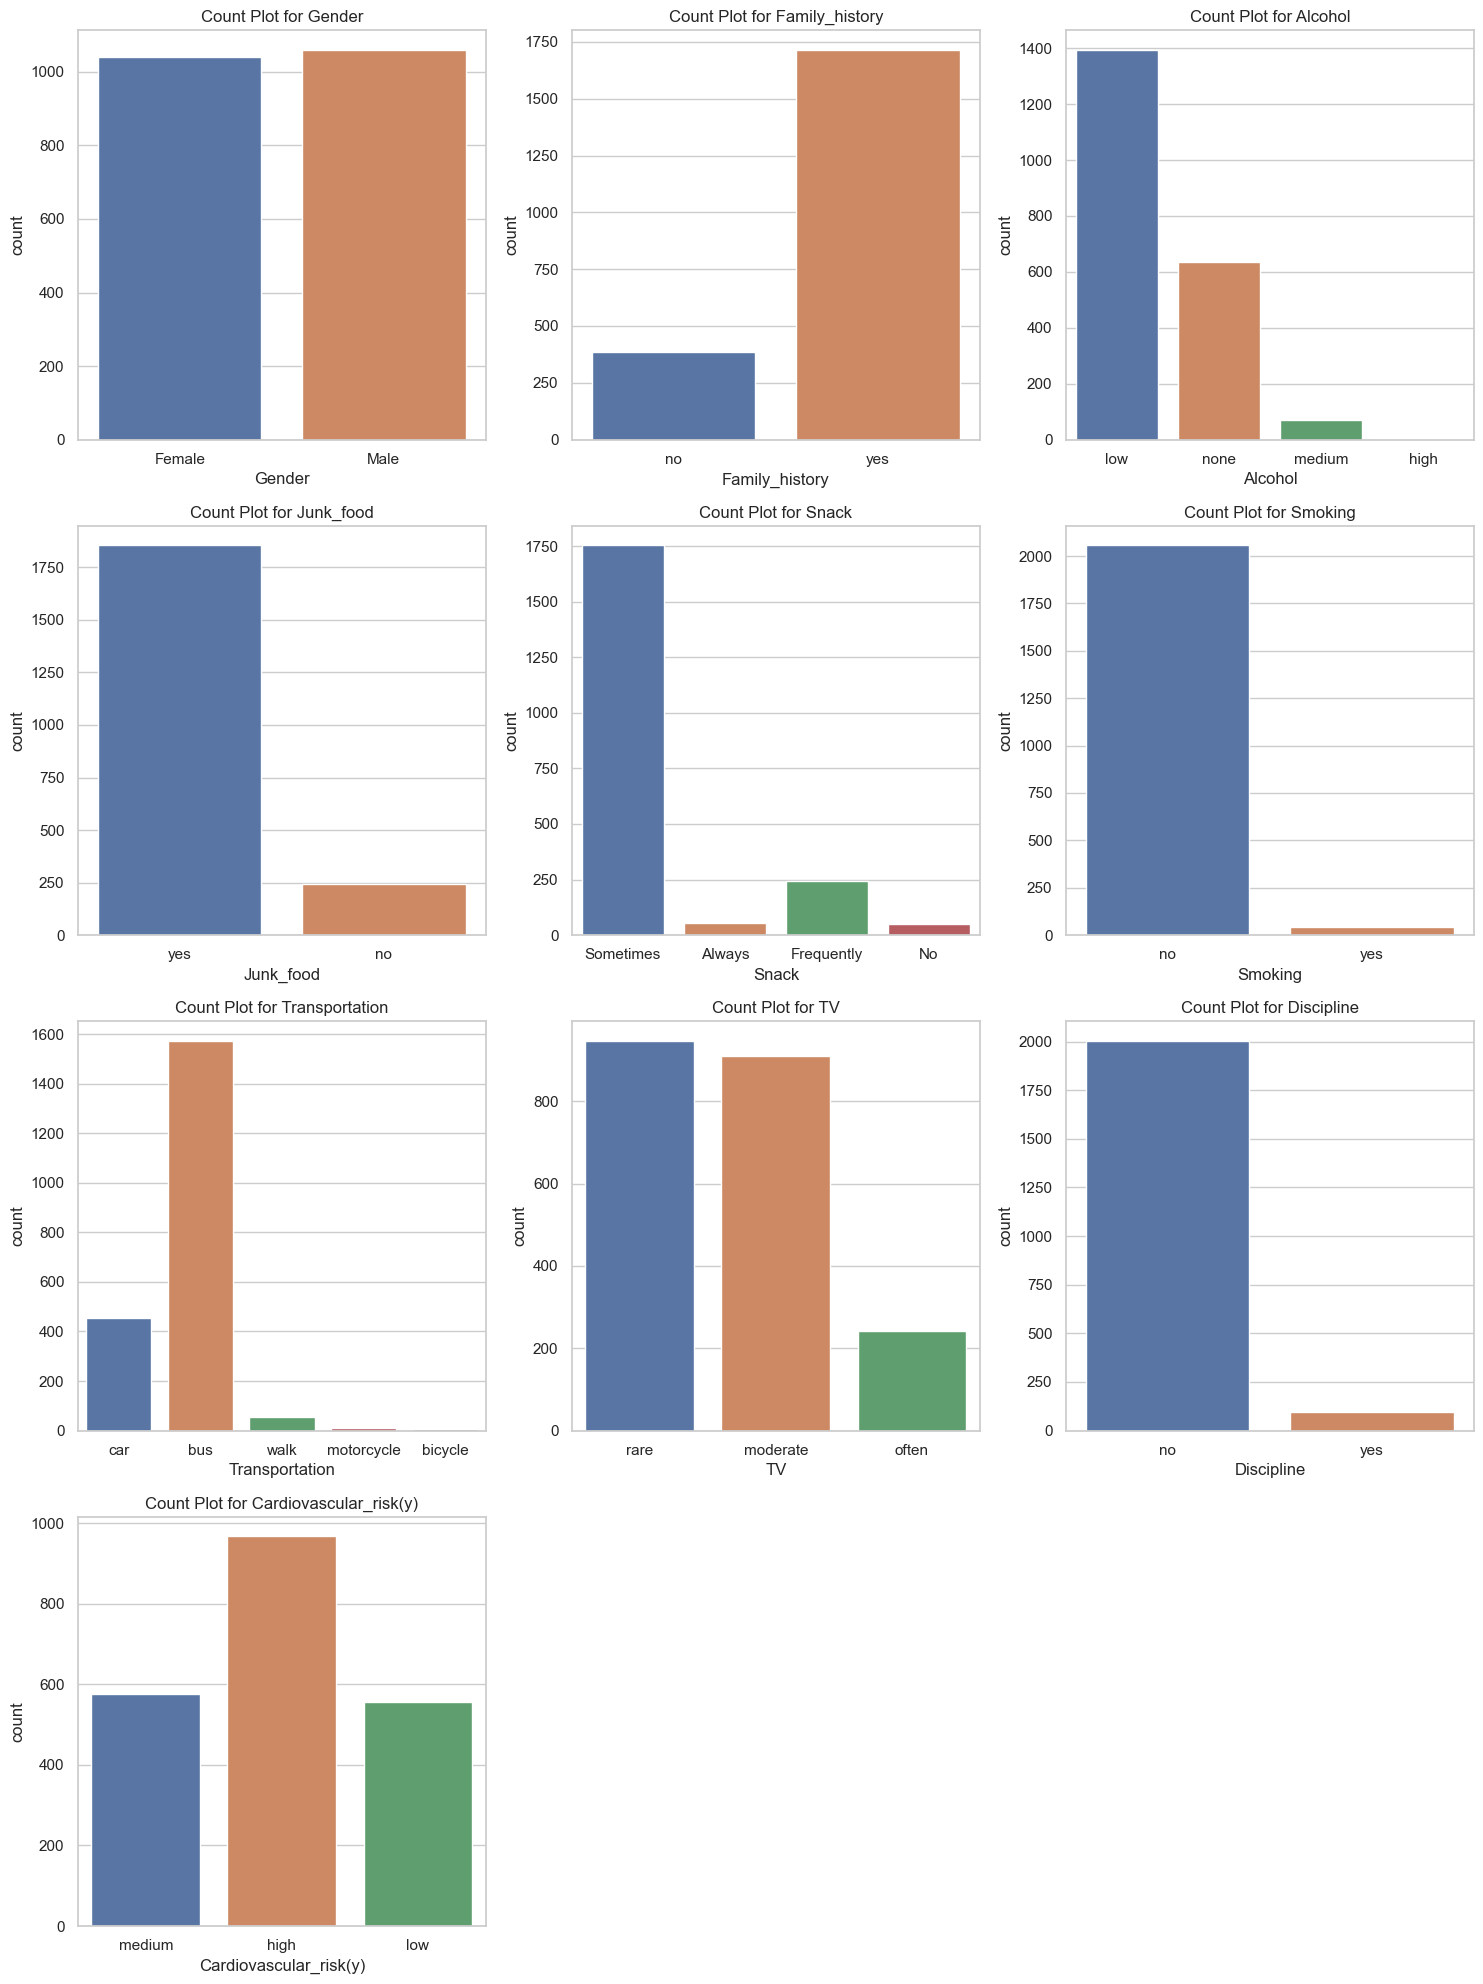

In [12]:
# Automatically identify all categorical features in the dataset
categorical_features = ds.select_dtypes(include=['object']).columns.tolist()

# Set up the number of rows and columns for the grid
n_rows = (len(categorical_features) + 2) // 3  # Calculate number of rows needed (3 columns per row)
n_cols = 3  # You can adjust this based on how many columns you want per row

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize dynamically based on n_rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical feature and create a count plot on a subplot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=ds, x=feature, ax=axes[i])
    axes[i].set_title(f'Count Plot for {feature}')

# Hide any empty subplots if the grid is larger than the number of features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

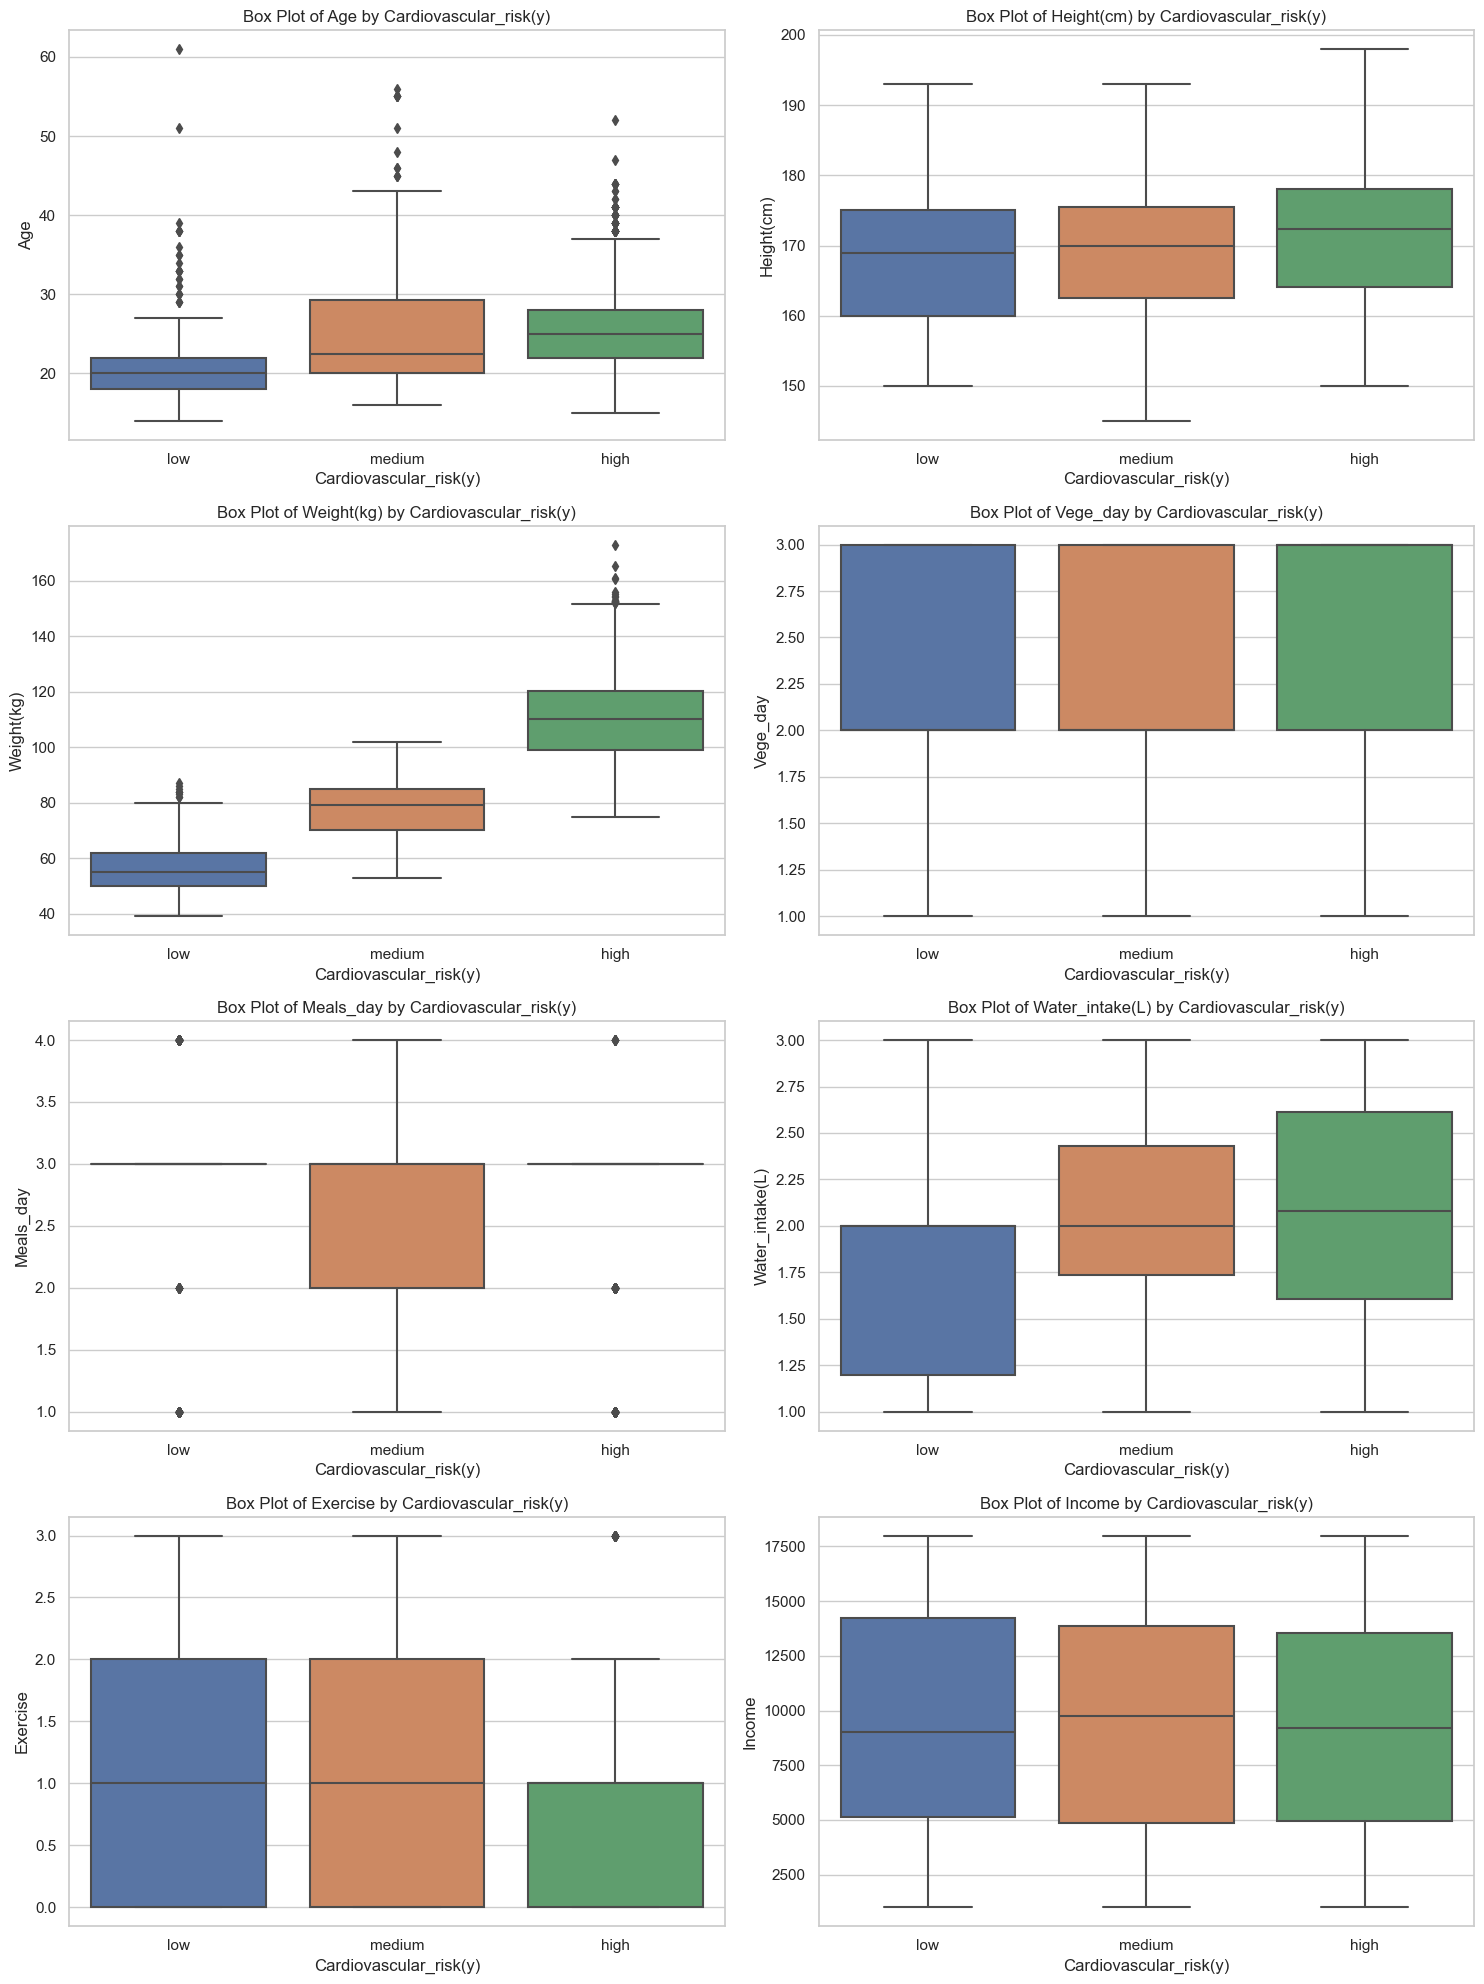

In [13]:
# Load your dataset (assuming it is loaded as 'ds')
# ds = pd.read_csv('dataset.csv')  # Uncomment and modify if the dataset needs to be loaded

# List all numerical features (columns) in the dataset 'ds'
numerical_features = ds.select_dtypes(include=['number']).columns.tolist()

# Define the categorical variable for comparison
categorical_variable = 'Cardiovascular_risk(y)'  # Replace with your actual categorical variable

# Specify the desired order of categories
category_order = ['low', 'medium', 'high']

# Set up the number of rows and columns for the grid
n_rows = (len(numerical_features) + 1) // 2  # Calculate number of rows needed (2 columns per row)
n_cols = 2  # Number of columns

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize dynamically based on n_rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a box plot on a subplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=categorical_variable, y=feature, data=ds, ax=axes[i], order=category_order)
    axes[i].set_title(f'Box Plot of {feature} by {categorical_variable}')
    axes[i].set_xlabel(categorical_variable)
    axes[i].set_ylabel(feature)

# Hide any empty subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## 2.3: Data Preprocessing 

Unique Values in Categorical Features:
Nominal
Gender: ['Female' 'Male']
Transportation: ['car' 'bus' 'walk' 'motorcycle' 'bicycle']
Smoking: ['no' 'yes']
Family_history: ['no' 'yes']
Junk_food: ['yes' 'no']
Alcohol: ['low' 'none' 'medium' 'high']
Discipline: ['no' 'yes']

Ordinal:
Snack: ['Sometimes' 'Always' 'Frequently' 'No']
TV: ['rare' 'moderate' 'often']
Cardiovascular_risk(y): ['medium' 'high' 'low']


# Train Set


In [14]:
from sklearn.model_selection import  train_test_split
X = ds.drop('Cardiovascular_risk(y)',axis=1)
y = ds['Cardiovascular_risk(y)']
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=69)
# split the input matrix into numerical and categorical attributes
X_train_num  = X_train.drop(['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline'], axis = 1)
# Nominal variables
X_train_cat_nom = X_train[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]

# Ordinal variables
X_train_cat_ord = X_train[['Alcohol', 'Snack', 'TV']]

# Fill missing values with median
from sklearn.impute import SimpleImputer   
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train_num)                              # compute the median     
X_train_num_tr = imputer.transform(X_train_num)       # fill up missing values with median value for the feature

# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num_tr)       
X_train_num_tr = scaler.transform(X_train_num_tr)

# LabelBinarizer() categorical data

from sklearn.preprocessing import LabelBinarizer
lb_encoder = LabelBinarizer()
X_train_cat_nom_encoded = []

# One-hot encode each nominal column
for X_train_cat_iter in X_train_cat_nom.columns:
    X_train_cat_val = X_train_cat_nom[X_train_cat_iter]
    X_train_cat_val_nom = lb_encoder.fit_transform(X_train_cat_val)  # one-hot encode
    X_train_cat_nom_encoded.append(X_train_cat_val_nom)

# Stack all the one-hot encoded columns horizontally
X_train_cat_nom_encoded = np.hstack(X_train_cat_nom_encoded)
print(X_train_cat_nom_encoded)
from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()
X_train_cat_ord_encoded = []

# Label encode each ordinal column
for X_train_cat_iter in X_train_cat_ord.columns:
    X_train_cat_val = X_train_cat_ord[X_train_cat_iter]
    X_train_cat_val_ord = le_encoder.fit_transform(X_train_cat_val)
    X_train_cat_ord_encoded.append(X_train_cat_val_ord.reshape(-1, 1))  # reshape to keep it as a column

# Stack all the label encoded ordinal columns horizontally
X_train_cat_ord_encoded = np.hstack(X_train_cat_ord_encoded)

# Combine all the transformed categorical data
X_train_cat_encoded = np.hstack([X_train_cat_nom_encoded, X_train_cat_ord_encoded])
# combine the transformed numerical and categorical sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_encoded])
y_train = y_train.values;  #convert to numpy array


[[0 1 1 ... 0 1 0]
 [0 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [15]:
print('X_train_tr shape:',X_train_tr)
print('y_train shape:', y_train)

X_train_tr shape: [[-0.51948921 -0.96596855 -1.22346306 ...  1.          3.
   0.        ]
 [-0.51948921 -1.71607684 -1.43410782 ...  1.          3.
   2.        ]
 [-0.67586654  1.17719802 -0.28513641 ...  1.          3.
   2.        ]
 ...
 [ 1.51341607 -0.37659774 -0.23151774 ...  3.          3.
   1.        ]
 [-0.67586654  1.07003969  1.05533024 ...  3.          1.
   0.        ]
 [ 0.41877476  1.93802215  0.50382397 ...  1.          3.
   2.        ]]
y_train shape: ['low' 'low' 'low' ... 'medium' 'high' 'medium']


# Test Set

In [16]:
X_test_num = X_test.drop(['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'], axis=1)
X_test_cat_nom = X_test[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]
X_test_cat_ord = X_test[['Alcohol', 'Snack', 'TV']]
# Transform the numerical test set
X_test_num_tr = imputer.transform(X_test_num)
# Standardize the numerical test set
X_test_num_tr = scaler.transform(X_test_num_tr)
# One-hot encode the nominal test set
X_test_cat_nom_encoded = []

for i, column in enumerate(X_test_cat_nom.columns):
    lb_encoder = LabelBinarizer()
    lb_encoder.fit(X_train_cat_nom[column])  # fit on training data
    X_test_cat_val = X_test_cat_nom[column]
    X_test_cat_val_nom = lb_encoder.transform(X_test_cat_val)
    X_test_cat_nom_encoded.append(X_test_cat_val_nom)

X_test_cat_nom_encoded = np.hstack(X_test_cat_nom_encoded)

# Label encode the ordinal test set
X_test_cat_ord_encoded = []

for i, column in enumerate(X_test_cat_ord.columns):
    le_encoder = LabelEncoder()
    le_encoder.fit(X_train_cat_ord[column])  # fit on training data
    X_test_cat_val = X_test_cat_ord[column]
    X_test_cat_val_ord = le_encoder.transform(X_test_cat_val)
    X_test_cat_ord_encoded.append(X_test_cat_val_ord.reshape(-1, 1))  # reshape to keep it as a column

X_test_cat_ord_encoded = np.hstack(X_test_cat_ord_encoded)

X_test_cat_encoded = np.hstack([X_test_cat_nom_encoded, X_test_cat_ord_encoded])

X_test_tr = np.hstack([X_test_num_tr, X_test_cat_encoded])

y_test = y_test.values;  #convert to numpy array

In [17]:
print('X_train_tr shape:',X_test_tr)
print('y_train shape:', y_test)

X_train_tr shape: [[-0.20673455  0.35207889  0.45786511 ...  3.          3.
   1.        ]
 [-0.36311188  0.35207889 -1.36133963 ...  1.          1.
   0.        ]
 [-1.14499853  1.07003969 -1.39580877 ...  1.          1.
   0.        ]
 ...
 [-0.36311188  0.1913414  -0.17406917 ...  1.          3.
   0.        ]
 [-0.36311188 -1.50176019 -1.43410782 ...  3.          3.
   2.        ]
 [ 1.20066141  0.61997471  0.05572511 ...  1.          3.
   2.        ]]
y_train shape: ['high' 'low' 'low' 'low' 'medium' 'high' 'high' 'high' 'medium' 'high'
 'high' 'high' 'medium' 'high' 'medium' 'low' 'low' 'low' 'medium' 'low'
 'high' 'low' 'high' 'high' 'high' 'low' 'low' 'medium' 'high' 'medium'
 'high' 'high' 'high' 'high' 'medium' 'medium' 'high' 'high' 'medium'
 'low' 'medium' 'high' 'high' 'medium' 'high' 'high' 'low' 'high' 'low'
 'high' 'low' 'high' 'medium' 'medium' 'high' 'low' 'high' 'high' 'low'
 'medium' 'medium' 'low' 'low' 'low' 'high' 'low' 'high' 'low' 'high'
 'high' 'medium' 'low'

## 2.4: Model Training & Validation

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_tr,y_train)
y_pred = knn.predict(X_train_tr)
print("Accuracy:",  accuracy_score(y_train,y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_train,y_pred))
print("Classification Report: \n", classification_report(y_train,y_pred))

C:\Users\Asus\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Asus\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Asus\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Asus\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

Accuracy: 1.0
Confusion Matrix: 
 [[775   0   0]
 [  0 443   0]
 [  0   0 462]]
Classification Report: 
               precision    recall  f1-score   support

        high       1.00      1.00      1.00       775
         low       1.00      1.00      1.00       443
      medium       1.00      1.00      1.00       462

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of k values to test
k_range = range(1, 31)

# List to store cross-validated scores for each k
cv_scores = []

# Perform cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation and take the mean accuracy
    scores = cross_val_score(knn, X_train_tr, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the k with the highest cross-validated accuracy
best_k = k_range[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f"Best k: {best_k}")
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

Best k: 1
Best Cross-Validated Accuracy: 0.8494


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=69)

# Train the model on the training data
rf_model.fit(X_train_tr, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train_tr)  # Predict using the training set

# Evaluate model performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy on training set
print(f"Accuracy on training set: {train_accuracy:.4f}")

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_train_tr, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# Detailed classification report for the training set
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred))  # Use y_train and y_train_pred

# Confusion Matrix for the training set
print("\nConfusion Matrix (Training Set):")
print(confusion_matrix(y_train, y_train_pred))  # Use y_train and y_train_pred

Accuracy on training set: 1.0000
Cross-validation scores: [0.9702381  0.9375     0.9702381  0.96428571 0.95535714]
Mean cross-validation score: 0.9595

Classification Report (Training Set):
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       775
         low       1.00      1.00      1.00       443
      medium       1.00      1.00      1.00       462

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680


Confusion Matrix (Training Set):
[[775   0   0]
 [  0 443   0]
 [  0   0 462]]


In [21]:
# Predict on the test set
y_test_pred = rf_model.predict(X_test_tr)

# Evaluate model performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.4f}")

# Detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Accuracy on test set: 0.9667

Classification Report (Test Set):
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       192
         low       0.98      0.91      0.95       114
      medium       0.91      0.98      0.95       114

    accuracy                           0.97       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.97      0.97      0.97       420


Confusion Matrix (Test Set):
[[190   1   1]
 [  0 104  10]
 [  1   1 112]]


# Logistic Regression

Accuracy on training set: 0.9839

Classification Report (Training Set):
              precision    recall  f1-score   support

        high       1.00      0.99      1.00       775
         low       0.99      0.96      0.97       443
      medium       0.96      0.99      0.97       462

    accuracy                           0.98      1680
   macro avg       0.98      0.98      0.98      1680
weighted avg       0.98      0.98      0.98      1680


Confusion Matrix (Training Set):
[[771   0   4]
 [  0 426  17]
 [  1   5 456]]


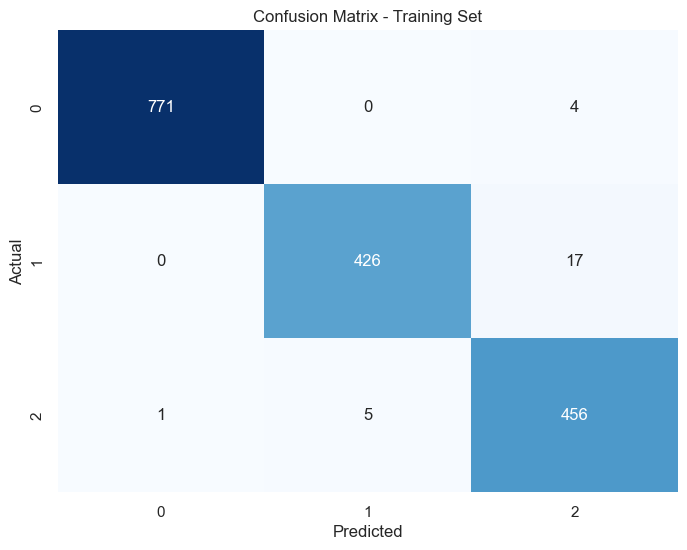


Cross-validation scores: [0.98511905 0.96428571 0.9702381  0.9672619  0.97321429]
Average cross-validation score: 0.9720


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=69)

# Train the model on the training data
log_reg.fit(X_train_tr, y_train)

# Predict on the training data
y_train_pred = log_reg.predict(X_train_tr)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training set: {train_accuracy:.4f}')

# Classification report for the training set
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

# Confusion matrix for the training set
print("\nConfusion Matrix (Training Set):")
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)

# Plotting the confusion matrix for the training set
plt.figure(figsize=(8,6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Cross-validation on the training set
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(log_reg, X_train_tr, y_train, cv=5)
print(f'\nCross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {cross_val_scores.mean():.4f}')



Accuracy on test set: 0.9667

Classification Report (Test Set):
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       192
         low       0.99      0.91      0.95       114
      medium       0.90      0.98      0.94       114

    accuracy                           0.97       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.97      0.97      0.97       420


Confusion Matrix (Test Set):
[[190   0   2]
 [  0 104  10]
 [  1   1 112]]


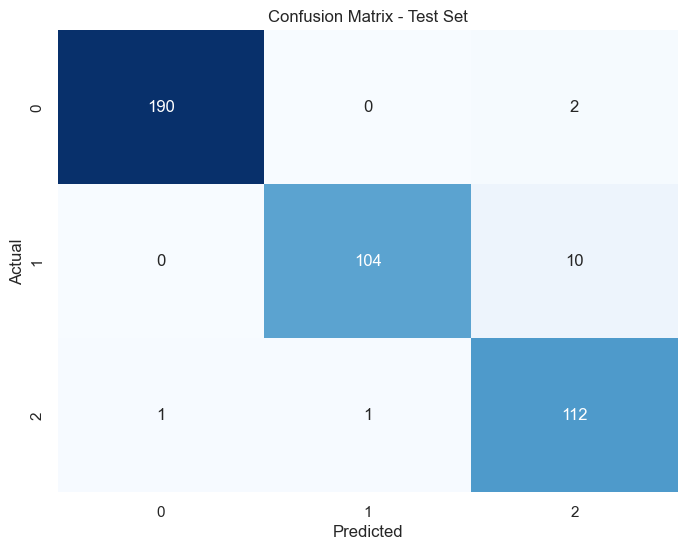

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = log_reg.predict(X_test_tr)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy on test set: {test_accuracy:.4f}')

# Classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Confusion matrix for the test set
print("\nConfusion Matrix (Test Set):")
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

# Plotting the confusion matrix for the test set
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()
